In [1]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

sys.path.append("../")

<AxesSubplot: >

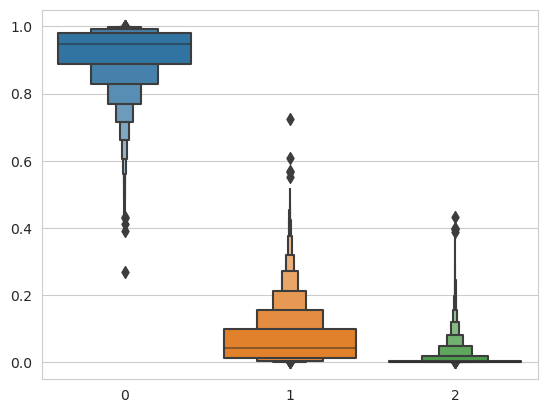

In [14]:
sns.boxenplot(np.random.dirichlet(10*np.array([0.92, 0.07, 0.01]), size=10000))

In [68]:
from scipy.special import gamma

def beta_constant(a):
    return np.prod(gamma(a)) / gamma(a.sum())

In [80]:
ws = np.array([beta_constant(np.array([42.2, 3.7, 0.1])), beta_constant(np.array([42.2, 1.7, 2.1])), 2*beta_constant(np.array([42.2, 2.7, 1.1]))])

In [81]:
weights = ws / ws.sum()

In [83]:
weights @ np.array([
    np.array([42.2, 3.7, 0.1]) / np.array([42.2, 3.7, 0.1]).sum(),
    np.array([42.2, 1.7, 2.1]) / np.array([42.2, 1.7, 2.1]).sum(),
    np.array([42.2, 2.7, 1.1]) / np.array([42.2, 2.7, 1.1]).sum()
])

array([0.9173913 , 0.07801932, 0.00458937])

In [143]:
from scipy.stats import dirichlet

dirs = [dirichlet([42.2, 3.7, 0.1]), dirichlet([42.2, 1.7, 2.1]), dirichlet([42.2, 2.7, 1.1])]

sample = []
for z in np.random.choice([0,1,2], p=weights, size=100000):
    dir_rv = dirs[z].rvs(size=None)
    sample.append(dir_rv)

sample = np.array(sample)
np.round(pd.Series(sample[:,0] / (sample[:,1] + sample[:, 2])).describe(percentiles=[0.025, 0.975]), 2)

count    100000.00
mean         15.10
std          11.75
min           1.94
2.5%          4.63
50%          12.10
97.5%        43.53
max         666.99
dtype: float64

<AxesSubplot: >

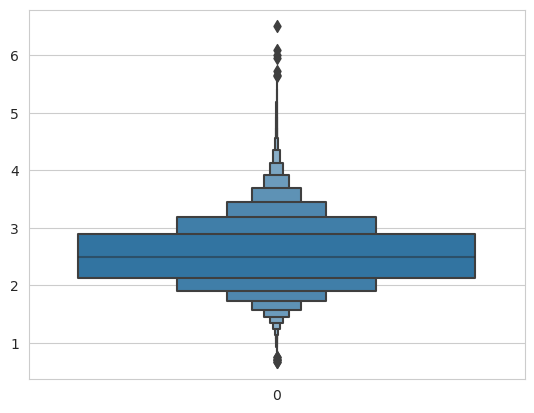

In [144]:
sns.boxenplot(np.log(pd.Series(sample[:,0] / (sample[:,1] + sample[:, 2]))))

In [156]:
prior = dirichlet([9.2,0.7,0.1]).rvs(size=100000)
np.round(pd.Series(prior[:,0] / (prior[:,1] + prior[:,2])).describe(percentiles=[0.025, 0.975]), 2)

count      100000.00
mean         1060.68
std         76955.63
min             0.43
2.5%            2.34
50%            17.76
97.5%         995.48
max      13243250.83
dtype: float64

<AxesSubplot: >

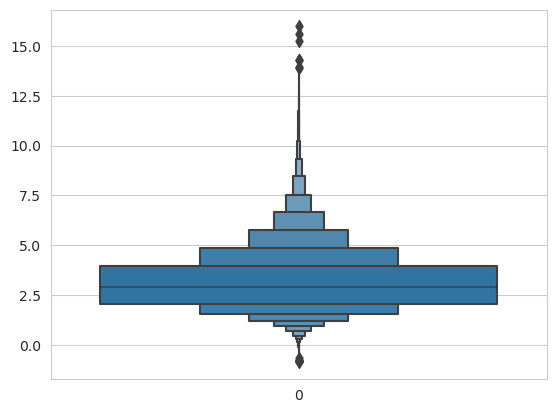

In [152]:
sns.boxenplot(np.log(pd.Series(prior[:,0] / (prior[:,1] + prior[:,2]))))